# Código del TFG Andoni Garrido


# Iniciación
## Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Montar Drive
Montamos la carpeta de Drive para acceder a los datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extracción
De la base de datos de toolbox elegimos y extraermos las siguientes caracteristicas de cada usuario:
- ``age``: edad del usuario
- ``total_ok``: cuantos ejercicios han hecho correctamente
- ``total_error``: cuantos ejercicios han hecho erroneamente
- ``total_tip``: cuantas veces han accedido a una pista
- ``total_wiki``: cuantas veces han accedido a la wiki
- ``total_time``: cuanto tiempo han pasado en la plataforma

Para obtener estos datos, ejecutamos el siguiente comando SQL contra la base de datos:

`` SELECT student.user_id, student.age, SUM(log.num_ok) AS 'total_ok', SUM(log.num_error) AS 'total_error', SUM(log.num_tip) AS 'total_tip', SUM(log.num_wiki) AS 'total_wiki', SUM(log.elapsed_time) AS 'total_time' FROM (‘log’ INNER JOIN ‘student’ IN log.user_ide = student.user_id)GROUP BY student.user_id; ``

Cabe recalcar que la base de datos esta anonimizada.

In [3]:
# Dataset inicial
raw_data = pd.read_csv('/content/drive/MyDrive/INFOR/4.KURTSOA/TFG/Datasets/raw_data.csv')

In [ ]:
raw_data.describe()

,user_id,age,total_ok,total_error,total_tip,total_wiki,total_time
count,14170.000000,14170.000000,14170.000000,14170.000000,14170.000000,14170.000000,1.417000e+04
mean,16361.786733,16.768596,258.828652,186.211150,3.342696,2.304940,3.300159e+04
std,9339.131026,62.699426,249.632280,336.355066,11.770897,10.777723,1.577240e+05
min,117.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8303.250000,13.000000,72.000000,10.000000,0.000000,0.000000,2.146250e+03
50%,15967.500000,15.000000,211.000000,58.000000,0.000000,0.000000,8.610000e+03
75%,24297.750000,17.000000,365.000000,206.000000,2.000000,0.000000,2.394425e+04
max,32296.000000,2021.000000,2589.000000,5797.000000,378.000000,386.000000,8.228371e+06


# Preprocesamiento y limpieza
Una vez tenemos los datos, hacemos el proceso de limpieza del datasest. Para ello, buscamos casos repetidos o que contengan caracteristicas vacias (NaN).




## Eliminar nulos y filas repetidas

In [ ]:
# Identificar valores nulos
# Todas las columnas tienen que tener 14170 valores no nulos
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14170 entries, 0 to 14169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      14170 non-null  int64
 1   age          14170 non-null  int64
 2   total_ok     14170 non-null  int64
 3   total_error  14170 non-null  int64
 4   total_tip    14170 non-null  int64
 5   total_wiki   14170 non-null  int64
 6   total_time   14170 non-null  int64
dtypes: int64(7)
memory usage: 775.0 KB


In [ ]:
# Identificar filas duplicadas
print('\n\nNumero de filas duplicadas: ', len(raw_data.loc[raw_data.duplicated()]))



Numero de filas duplicadas:  0


## Selección de estudiantes

Se selecciones alumnos que cumplan tengas entre 6 y 18 años ($age \in [ 6,18]$) y que hayan pasado en la plataforma mas de 10 minutos.

In [4]:
# Alumnos entre 6 y 18 años
data = raw_data[(raw_data['age']>5) & (raw_data['age']<19)]
# Alumnos que hayan pasado mas de 10 minutos en la plataforma. 
# Los tiempos esta en segundos, con lo cual, 10 min -> 600 s
data = data[data['total_time']>=600]

# Data set limpi

Hemos pasado de 14170 a 11147 alumnos, 3023 han sido omitidos.

In [ ]:
# data.to_csv('/content/drive/MyDrive/INFOR/4.KURTSOA/TFG/Datasets/raw_data_cleaned.csv')

# Estudio de las variables

## Primer vistazo a los datos
Plotear las variable con seaborn

In [5]:
sns.set_style('white')
sns.set(font_scale = 1.2)

Text(0.5, 0.98, 'Districución de las variables')

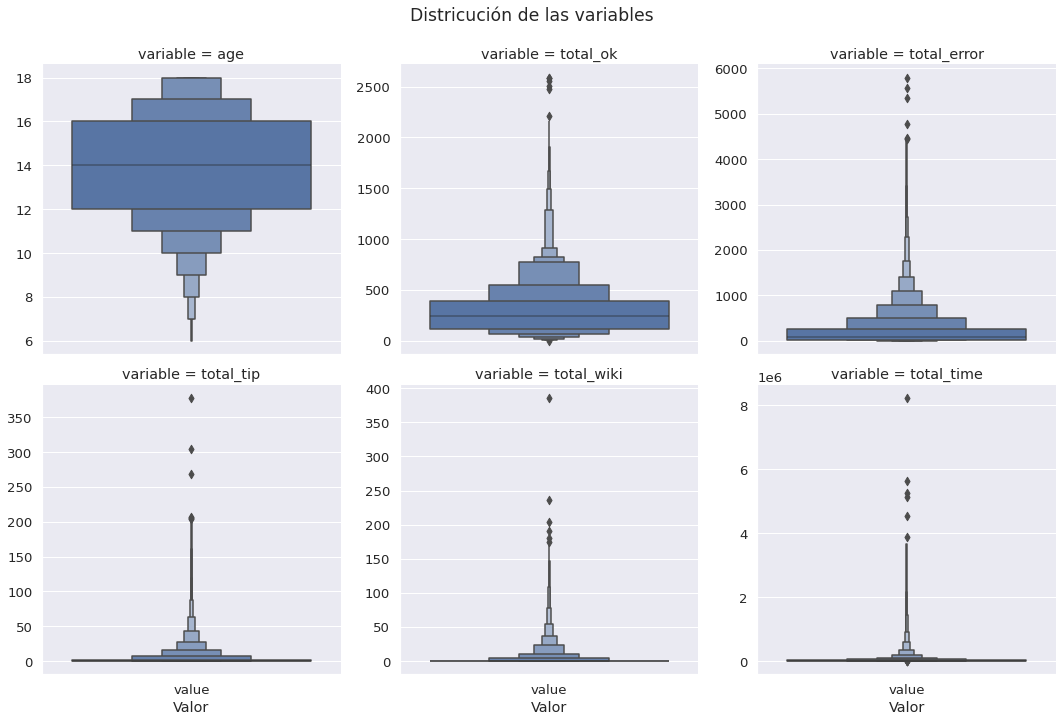

In [6]:
g = sns.catplot(
    col="variable",
    data=data.drop('user_id',axis=1).melt(),
    kind='boxen',
    sharey=False,
    col_wrap=3,
)
g.set(xlabel="Valor")

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Districución de las variables')

## Transformaciones
Se analiza cada variable para identifiar el tipo de transformación que necestia

### Age

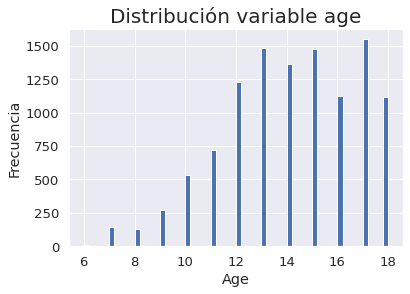

In [7]:
plt.hist(data['age'],bins=60,histtype='bar')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

font1 = {'size':20}

plt.title('Distribución variable age',fontdict=font1)

plt.show()

Ya que no sigue una transformación normal ni exponencial, se le aplica una tranformación de cuartillas.

In [8]:
from sklearn.preprocessing import QuantileTransformer

quan_trans= QuantileTransformer(output_distribution='normal')

t_age = quan_trans.fit_transform(data[['age']])

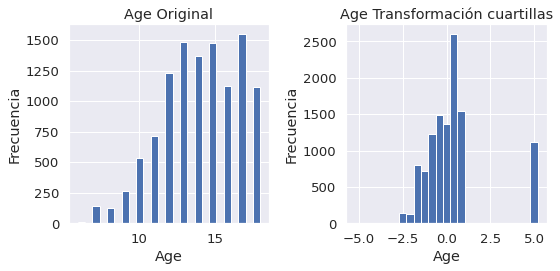

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax1.hist(data['age'],bins=25,histtype='bar')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Age Original')


ax2.hist(t_age,bins=25,histtype='bar')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Age Transformación cuartillas')

fig.tight_layout()

Se mantienen los valores originales porque tienen una mejor distribución

### Total_ok

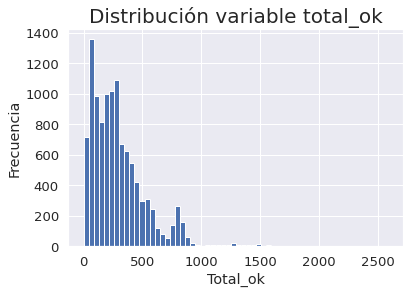

In [10]:
plt.hist(data['total_ok'],bins=60,histtype='bar')
plt.xlabel('Total_ok')
plt.ylabel('Frecuencia')

font1 = {'size':20}

plt.title('Distribución variable total_ok',fontdict=font1)

plt.show()

Como sigue una distribución de ley exponencial se aplica una transformación logaritmica. Además, como puede coger valor 0 la función de transformación será $\log (x+1)$.

In [11]:
total_ok_log = data['total_ok'].map(lambda x: np.log1p(x))

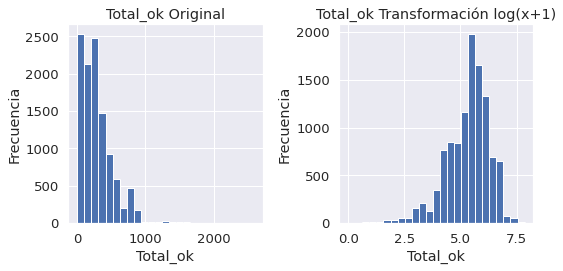

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax1.hist(data['total_ok'],bins=25,histtype='bar')
ax1.set_xlabel('Total_ok')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Total_ok Original')


ax2.hist(total_ok_log,bins=25,histtype='bar')
ax2.set_xlabel('Total_ok')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Total_ok Transformación log(x+1)')

fig.tight_layout()

### Total_error

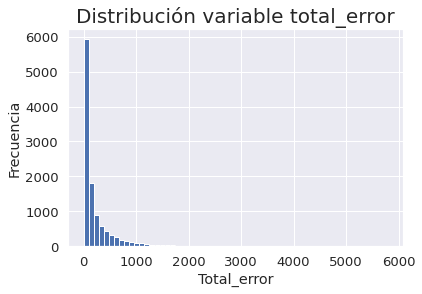

In [13]:
plt.hist(data['total_error'],bins=60,histtype='bar')
plt.xlabel('Total_error')
plt.ylabel('Frecuencia')

font1 = {'size':20}

plt.title('Distribución variable total_error',fontdict=font1)

plt.show()

Al igual que total_ok sigue una distribución de ley exponencial. Por ello, se le aplicará una transformación logaritmica. Como puede coger valor 0 la función de transformación será $\log (x+1)$

In [14]:
total_error_log = data['total_error'].map(lambda x: np.log1p(x))

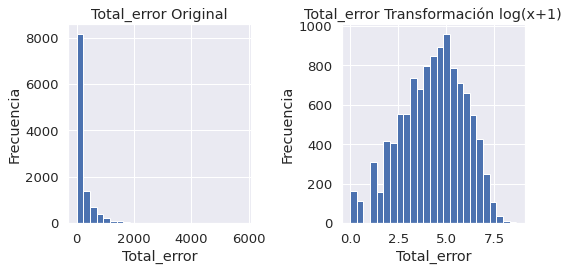

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax1.hist(data['total_error'],bins=25,histtype='bar')
ax1.set_xlabel('Total_error')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Total_error Original')


ax2.hist(total_error_log,bins=25,histtype='bar')
ax2.set_xlabel('Total_error')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Total_error Transformación log(x+1)')

fig.tight_layout()

### Total_tip

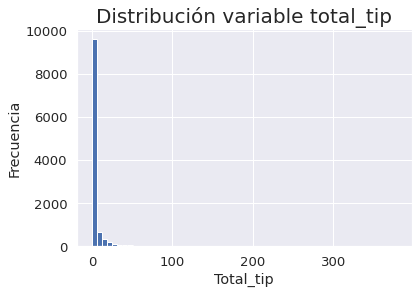

In [16]:
plt.hist(data['total_tip'],bins=60,histtype='bar')
plt.xlabel('Total_tip')
plt.ylabel('Frecuencia')

font1 = {'size':20}

plt.title('Distribución variable total_tip',fontdict=font1)

plt.show()

No sigue una distribución normal ni exponencial. Por ello la tranformación será de cuartillas.

In [17]:
# Importamos la funcions para aplicar la transformacion de cuartillas
from sklearn.preprocessing import QuantileTransformer

quan_trans= QuantileTransformer(output_distribution='normal')

t_tip = quan_trans.fit_transform(data[['total_tip']])

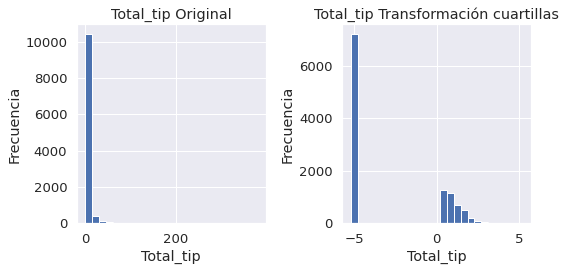

In [18]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax1.hist(data['total_tip'],bins=25,histtype='bar')
ax1.set_xlabel('Total_tip')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Total_tip Original')


ax2.hist(t_tip,bins=25,histtype='bar')
ax2.set_xlabel('Total_tip')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Total_tip Transformación cuartillas')

fig.tight_layout()

### Total_wiki

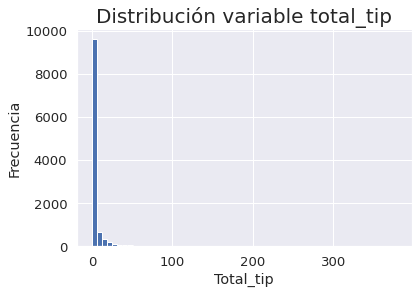

In [19]:
plt.hist(data['total_tip'],bins=60,histtype='bar')
plt.xlabel('Total_tip')
plt.ylabel('Frecuencia')

font1 = {'size':20}

plt.title('Distribución variable total_tip',fontdict=font1)

plt.show()

El mismo caso que total_tip

In [20]:
t_wiki = quan_trans.fit_transform(data[['total_wiki']])

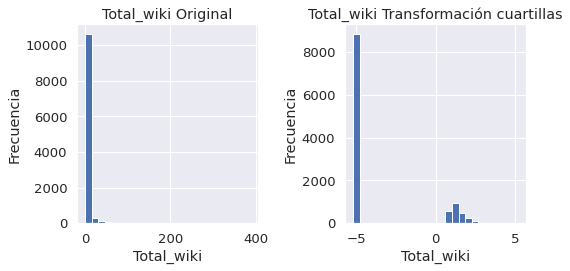

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax1.hist(data['total_wiki'],bins=25,histtype='bar')
ax1.set_xlabel('Total_wiki')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Total_wiki Original')


ax2.hist(t_wiki,bins=25,histtype='bar')
ax2.set_xlabel('Total_wiki')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Total_wiki Transformación cuartillas')

fig.tight_layout()

### Total_time

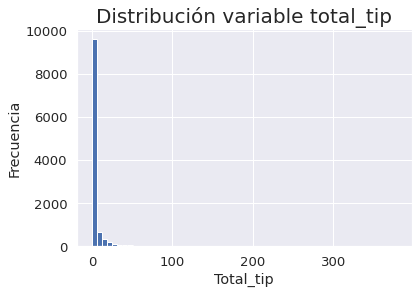

In [22]:
plt.hist(data['total_tip'],bins=60,histtype='bar')
plt.xlabel('Total_tip')
plt.ylabel('Frecuencia')

font1 = {'size':20}

plt.title('Distribución variable total_tip',fontdict=font1)

plt.show()

Transformación de cuartillas

In [23]:
t_time = quan_trans.fit_transform(data[['total_time']])

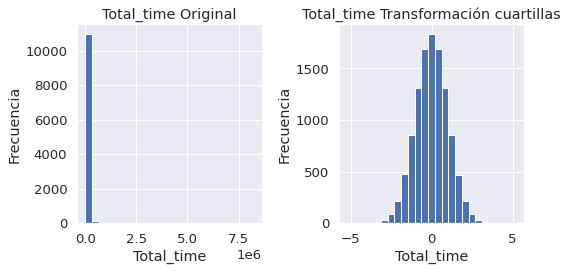

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax1.hist(data['total_time'],bins=25,histtype='bar')
ax1.set_xlabel('Total_time')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Total_time Original')


ax2.hist(t_time,bins=25,histtype='bar')
ax2.set_xlabel('Total_time')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Total_time Transformación cuartillas')

fig.tight_layout()

### Conclusion

Depsues de probar diferentes transformaciones en los atributos, estos son los mas adecuados:

\begin{array}{|c|c|}
    \hline
    \textbf{Atributo} & \textbf{Transformacion}\\
    \hline
    \texttt{age} & -  \\
    \hline
    \texttt{total\_ok}& log(1+x) \\
    \hline
    \texttt{total\_error}& log(1+x) \\
    \hline
    \texttt{total\_tip}& \textit{Cuantillas} \\
    \hline
    \texttt{total\_wiki}& \textit{Cuantillas} \\
    \hline
    \texttt{total\_time}& \textit{Cuantillas} \\
    \hline
\end{array}


In [25]:
data_trans = pd.DataFrame()
data_trans['age'] = data['age']
data_trans['total_ok'] = total_ok_log
data_trans['total_error'] = total_error_log
data_trans['total_tip'] = t_tip
data_trans['total_wiki'] = t_wiki
data_trans['total_time'] = t_time

In [26]:
# Añadimos la columna de IDs de usuario
data_trans['user_id'] = data['user_id'].to_list()

### Escalar todos los datos
Como los datos están en diferentes escalas, vamos a transformarlos para que estén en el mismo intervalo.

In [27]:
from sklearn.preprocessing import StandardScaler
# Instanciar la funcion
scaler = StandardScaler()
# Aplicar la funcion y guardar los datos transformados
data_trans_scaled = scaler.fit_transform(data_trans.drop('user_id',axis=1))
# Pasarlos a un DataFrame
data_trans_scaled = pd.DataFrame(data_trans_scaled,columns=data_trans.drop('user_id',axis=1).columns)
data_trans_scaled['user_id'] = data_trans['user_id'].tolist()


Visualizamos los datos transformados finales

Text(0.5, 0.98, 'Districución de las variables transformadas')

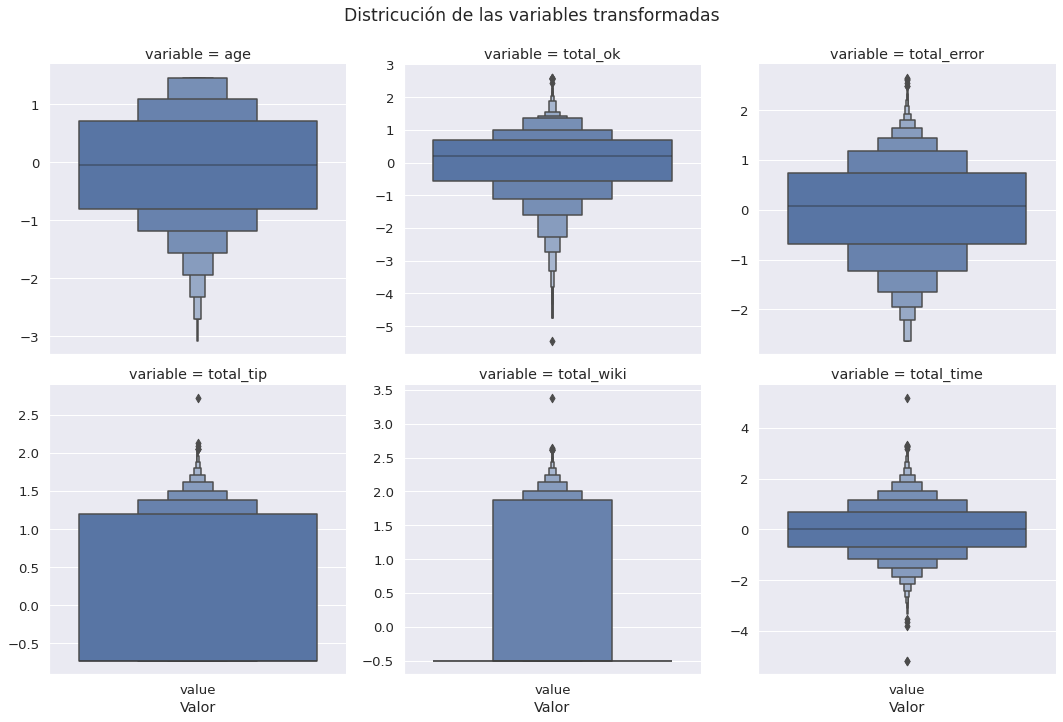

In [28]:
g = sns.catplot(
    col="variable",
    data=data_trans_scaled.drop('user_id',axis=1).melt(),
    kind='boxen',
    sharey=False,
    col_wrap=3,
)
g.set(xlabel="Valor")

g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Districución de las variables transformadas')

In [29]:
df_2 = pd.read_csv('/content/drive/MyDrive/INFOR/4.KURTSOA/TFG/Datasets/data_trans_scaled_final_3.csv')

## PCA

In [30]:
# Quitar los user_id para hacer el analisis PCA
data_no_ids = data_trans_scaled.drop('user_id',axis=1)

In [31]:
from sklearn.decomposition import PCA
# Instanciar la funcion
pca = PCA()
# Aplicar la funcion en los datos
data_pca = pca.fit_transform(data_no_ids)
# Crear nombres de los componentes principales
component_names = [f"PC{i+1}" for i in range(data_pca.shape[1])]
# Crear DataFrame
data_pca = pd.DataFrame(data_pca, columns=component_names)


### Componentes principales

In [32]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=data_no_ids.columns
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
age,-0.081493,-0.889018,0.434300,0.097580,0.045581,0.052819
total_ok,-0.511458,-0.126961,-0.207404,-0.222103,-0.782042,-0.135484
total_error,-0.534537,-0.027412,-0.109069,-0.107511,0.525025,-0.643749
total_tip,-0.333605,0.174584,0.097120,0.915731,-0.099316,0.019186
total_wiki,-0.235260,0.402857,0.842647,-0.259531,-0.065677,0.025204
total_time,-0.528583,-0.001857,-0.192312,-0.153850,0.310652,0.750625


### Varianza expresada y acumulada

In [33]:
# pca: parametro del tipo PCA despues de haberse aplicado a los datos.

def plot_variance(pca, width=8, dpi=100):
    # Crear figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Varianza explicada
    evr = pca.explained_variance_ratio_*100
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componentes", title="% Varianza explicada", ylim=(0.0, 100.0)
    )
    # Varianza acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componentes", title="% Varianza acumulada", ylim=(0.0, 100.0)
    )
  
    fig.set(figwidth=8, dpi=100)
    return axs


In [34]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="small",
    titleweight="bold",
    titlesize=13,
    titlepad=8,
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ea78c03d0>,
      dtype=object)

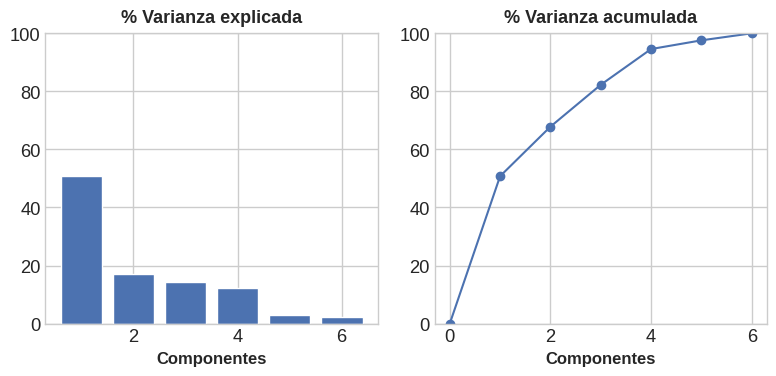

In [35]:
plot_variance(pca)

### Nueva variable mediante ratios
Analizando los componentes principales vemos que las variables total_ok y total_error abarcan mucha variabilidad y esta relacionadas. Utilizando la logica del rendimiento academico vamos a crear una nueva variable.

$accuracy = \dfrac{total\_ok}{total\_ok + total\_error}$

Para evitar una division entre zeros, nos aseguraremos que no hay ningun estudiante que tenga `total_ok` y `total_error` a zero.

In [36]:
data.loc[(data['total_ok'] == 0) & (data['total_error'] == 0)]

,user_id,age,total_ok,total_error,total_tip,total_wiki,total_time


No hay ningun caso. Con lo cual, podemos añadir nuestro nuevo atributo

In [57]:
data_no_ids['acc'] = data_trans['total_ok'] / (data_trans['total_ok'] + data_trans['total_error'])

Para finalizar vamos a escalar otra vez el dataset con la nueva variables

In [58]:
# Aprovechamos la funsion scaler instanciada anteriormente
df = scaler.fit_transform(data_no_ids)
df = pd.DataFrame(df,columns=data_no_ids.columns)

In [59]:
# Añadir los ids de usuario
df['user_id'] = data_trans_scaled['user_id'].tolist()

In [40]:
#df.to_csv('/content/drive/MyDrive/INFOR/4.KURTSOA/TFG/Datasets/df_scaled_final.csv',index=False)

Una vez analizando que de representativa es cada variable, seleccionamos las mejores y pasamos al clustering.
* accuracy
* total_tip
* total_wiki
* total_time

In [60]:
df

,age,total_ok,total_error,total_tip,total_wiki,total_time,acc,user_id
0,0.329031,-0.009995,0.542874,1.433906,1.939529,0.239147,-0.713222,117
1,-0.049669,0.802980,1.004357,1.589380,2.022815,0.940252,-0.703841,1009
2,-0.049669,0.337477,0.853614,-0.735185,1.760750,0.894205,-0.799408,1010
3,-0.049669,0.834425,0.794504,1.383316,-0.508104,0.820673,-0.527765,1011
4,-0.049669,0.413630,1.173417,1.540590,1.939529,0.790232,-1.003565,1012
...,...,...,...,...,...,...,...,...
11142,0.707731,-0.925944,-1.020776,-0.735185,1.916300,-1.554440,-0.463341,32280
11143,1.086431,-0.347549,-0.498055,-0.735185,-0.508104,-0.800459,NaN,32281
11144,1.086431,-0.427771,0.252317,1.402074,1.916300,-0.460476,-0.494864,32282
11145,1.086431,-0.105086,-0.412050,-0.735185,-0.508104,-0.614129,0.743667,32283


# Clustering

Una vez que tengamos los datos preparados, pasamos a analizar como hacer el clustering. Por un lado, analizaremos el numero de clusters y por otro lado los tipos de algoritmos (particiones, densidad o hierarquico).

In [ ]:
data_clustering = pd.read_csv('/content/drive/MyDrive/INFOR/4.KURTSOA/TFG/Datasets/df_scaled_final.csv')

In [42]:
data_clustering = df

In [43]:
atribs = ['acc','total_tip','total_wiki','total_time']

In [48]:
data_clustering = df[atribs]

KeyError: ignored

## Número de clusters



### Método del codo
Mediante este metodo queremos elegir el numero de clusters optimo mediante la visualizacion de la distorsión despues de haber lanzado el algoritmo `K-means` con $k \in [3,12]$.

In [ ]:
from sklearn.cluster import KMeans
# Instanciar el modelo
model = KMeans()

In [ ]:
# importar el visualizador del metodo del codo
from yellowbrick.cluster import KElbowVisualizer

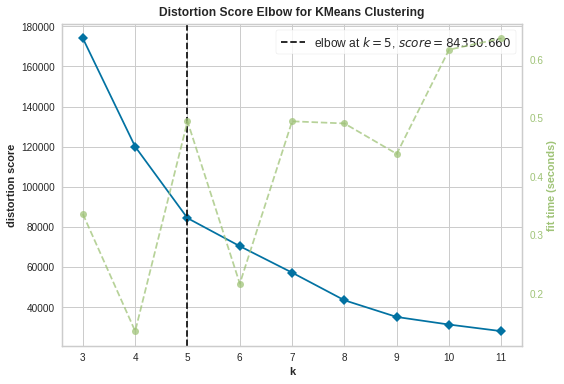

In [ ]:
# Instanciar el visualizador
vis = KElbowVisualizer(
    model, k = (3,12), metric='distortion', locate_elbow = True
)
# Ajustar los datos. No tendremos en cuenta los ID de usuario
vis.fit(data_clustering)
# Visualizar
vis.show()

### Índice Silhouette

Para crear este gráfico vamos a utilizar el visualizador del metodo del codo pero no vamos a activar la identificación ya que el gráfico no tiene la forma esperada. Sin embargo, nos vale para saber que partición tiene el mejor resultado en el índice Silhouette.

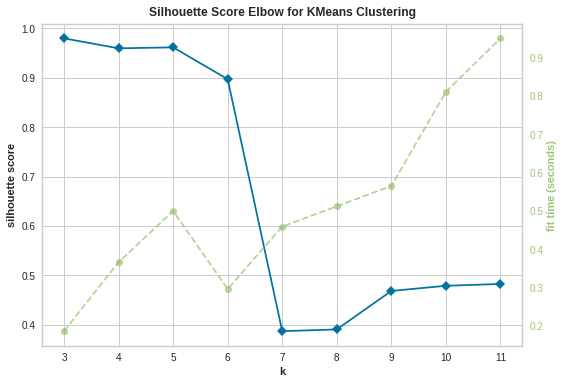

In [ ]:
# Instanciar el visualizador
vis = KElbowVisualizer(
    model, k = (3,12), metric='silhouette', locate_elbow = False
)
# Ajustar los datos. No tendremos en cuenta los ID de usuario
vis.fit(data_clustering)
# Visualizar
vis.show()

Según el método del codo el número óptimo de clusters es seis y según el índice Silhouette
es de cuatro. Cabe recalcar, que el índice Silhouette para seis clusters solo se reduce un
1, 8 %, con lo cual, el número de grupos óptimo para nuestro dataset es de seis.

## Algoritmos de clustering

### Basados en distancia

Dentro de este grupo hemos utilziado el algoritmo `K-means` que, a su vez, es un algoritmo basado en centroides.

In [ ]:
km6 = KMeans(n_clusters=6)

km6.fit(data_clustering)

KMeans(n_clusters=6)

Para evaluar la partición se ha utilizado el índice Silhouette.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(data_clustering,km6.labels_)

0.8975367009326423

Para visualizar el resultado lo vamos a hacer en un grafico de tres dimensiones para evitar la superposición de los puntos. Para ello, se ha hecho una reducción de la dimensionalidad a tres componentes.

In [ ]:
# Importar la funcion del analisis PCA
from sklearn.decomposition import PCA
# Instanciar la funcion indicardo el numero de componentes deseado para la reducción
pca_3 = PCA(n_components=3)
# Aplicar la función
data_pca3 = pca_3.fit_transform(data_clustering)
# Crear un DataFrame con el resultado
data_pca3 = pd.DataFrame(data_pca3,columns=['PC1','PC2','PC3'])

### Basados en densidad

### Jerárquicos

# Análisis de la partición